# STEP1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix

import tkinter as tk
from tkinter import ttk

# STEP2: LOAD THE DATASET

In [2]:
df= pd.read_csv("diabetes.csv")

# STEP3: EXPLORATORY DATA ANALYSIS

### Understanding Variables

##### 3.1: Head, Tail, Info and Sample of dataset

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
651,1,117,60,23,106,33.8,0.466,27,0


##### 3.2: Shape of the dataset

In [7]:
df.shape

(768, 9)

##### 3.3: Types of all columns

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##### 3.4: Info of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### 3.5: Summary of the dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### 3.6: Correlation of variables before data cleaning

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##### 3.7: Check and drop the duplicates

In [12]:
df.shape

(768, 9)

In [13]:
df= df.drop_duplicates()

In [14]:
df.shape

(768, 9)

##### 3.8: Check null values

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### 3.9: Check zero values and replace them with mean values

In [16]:
#checking
print('No. of zero values in Glucose ', df[df['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure ', df[df['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness ', df[df['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin ', df[df['Insulin']==0].shape[0])
print('No. of zero values in BMI ', df[df['BMI']==0].shape[0])

No. of zero values in Glucose  5
No. of zero values in BloodPressure  35
No. of zero values in SkinThickness  227
No. of zero values in Insulin  374
No. of zero values in BMI  11


In [17]:
#replace
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [18]:
#Again checking
print('No. of zero values in Glucose ', df[df['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure ', df[df['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness ', df[df['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin ', df[df['Insulin']==0].shape[0])
print('No. of zero values in BMI ', df[df['BMI']==0].shape[0])

No. of zero values in Glucose  0
No. of zero values in BloodPressure  0
No. of zero values in SkinThickness  0
No. of zero values in Insulin  0
No. of zero values in BMI  0


# STEP4: DATA CLEANING AND VISUALIZATION

### 4.1: Data visualization before cleaning

##### 4.1.1: Pie Chart and Count Plot

Negative(0): 500
Positive(1): 268


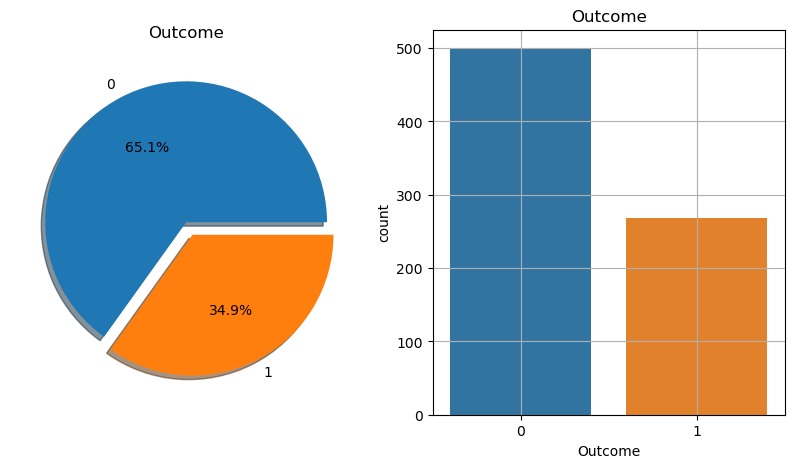

In [19]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart on the first subplot
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Plot countplot on the second subplot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

# Count the number of Negative (0) and Positive (1) outcomes
N, P = df['Outcome'].value_counts()
print('Negative(0):', N)
print('Positive(1):', P)

plt.grid()
plt.show()

##### 4.1.2: Histogram

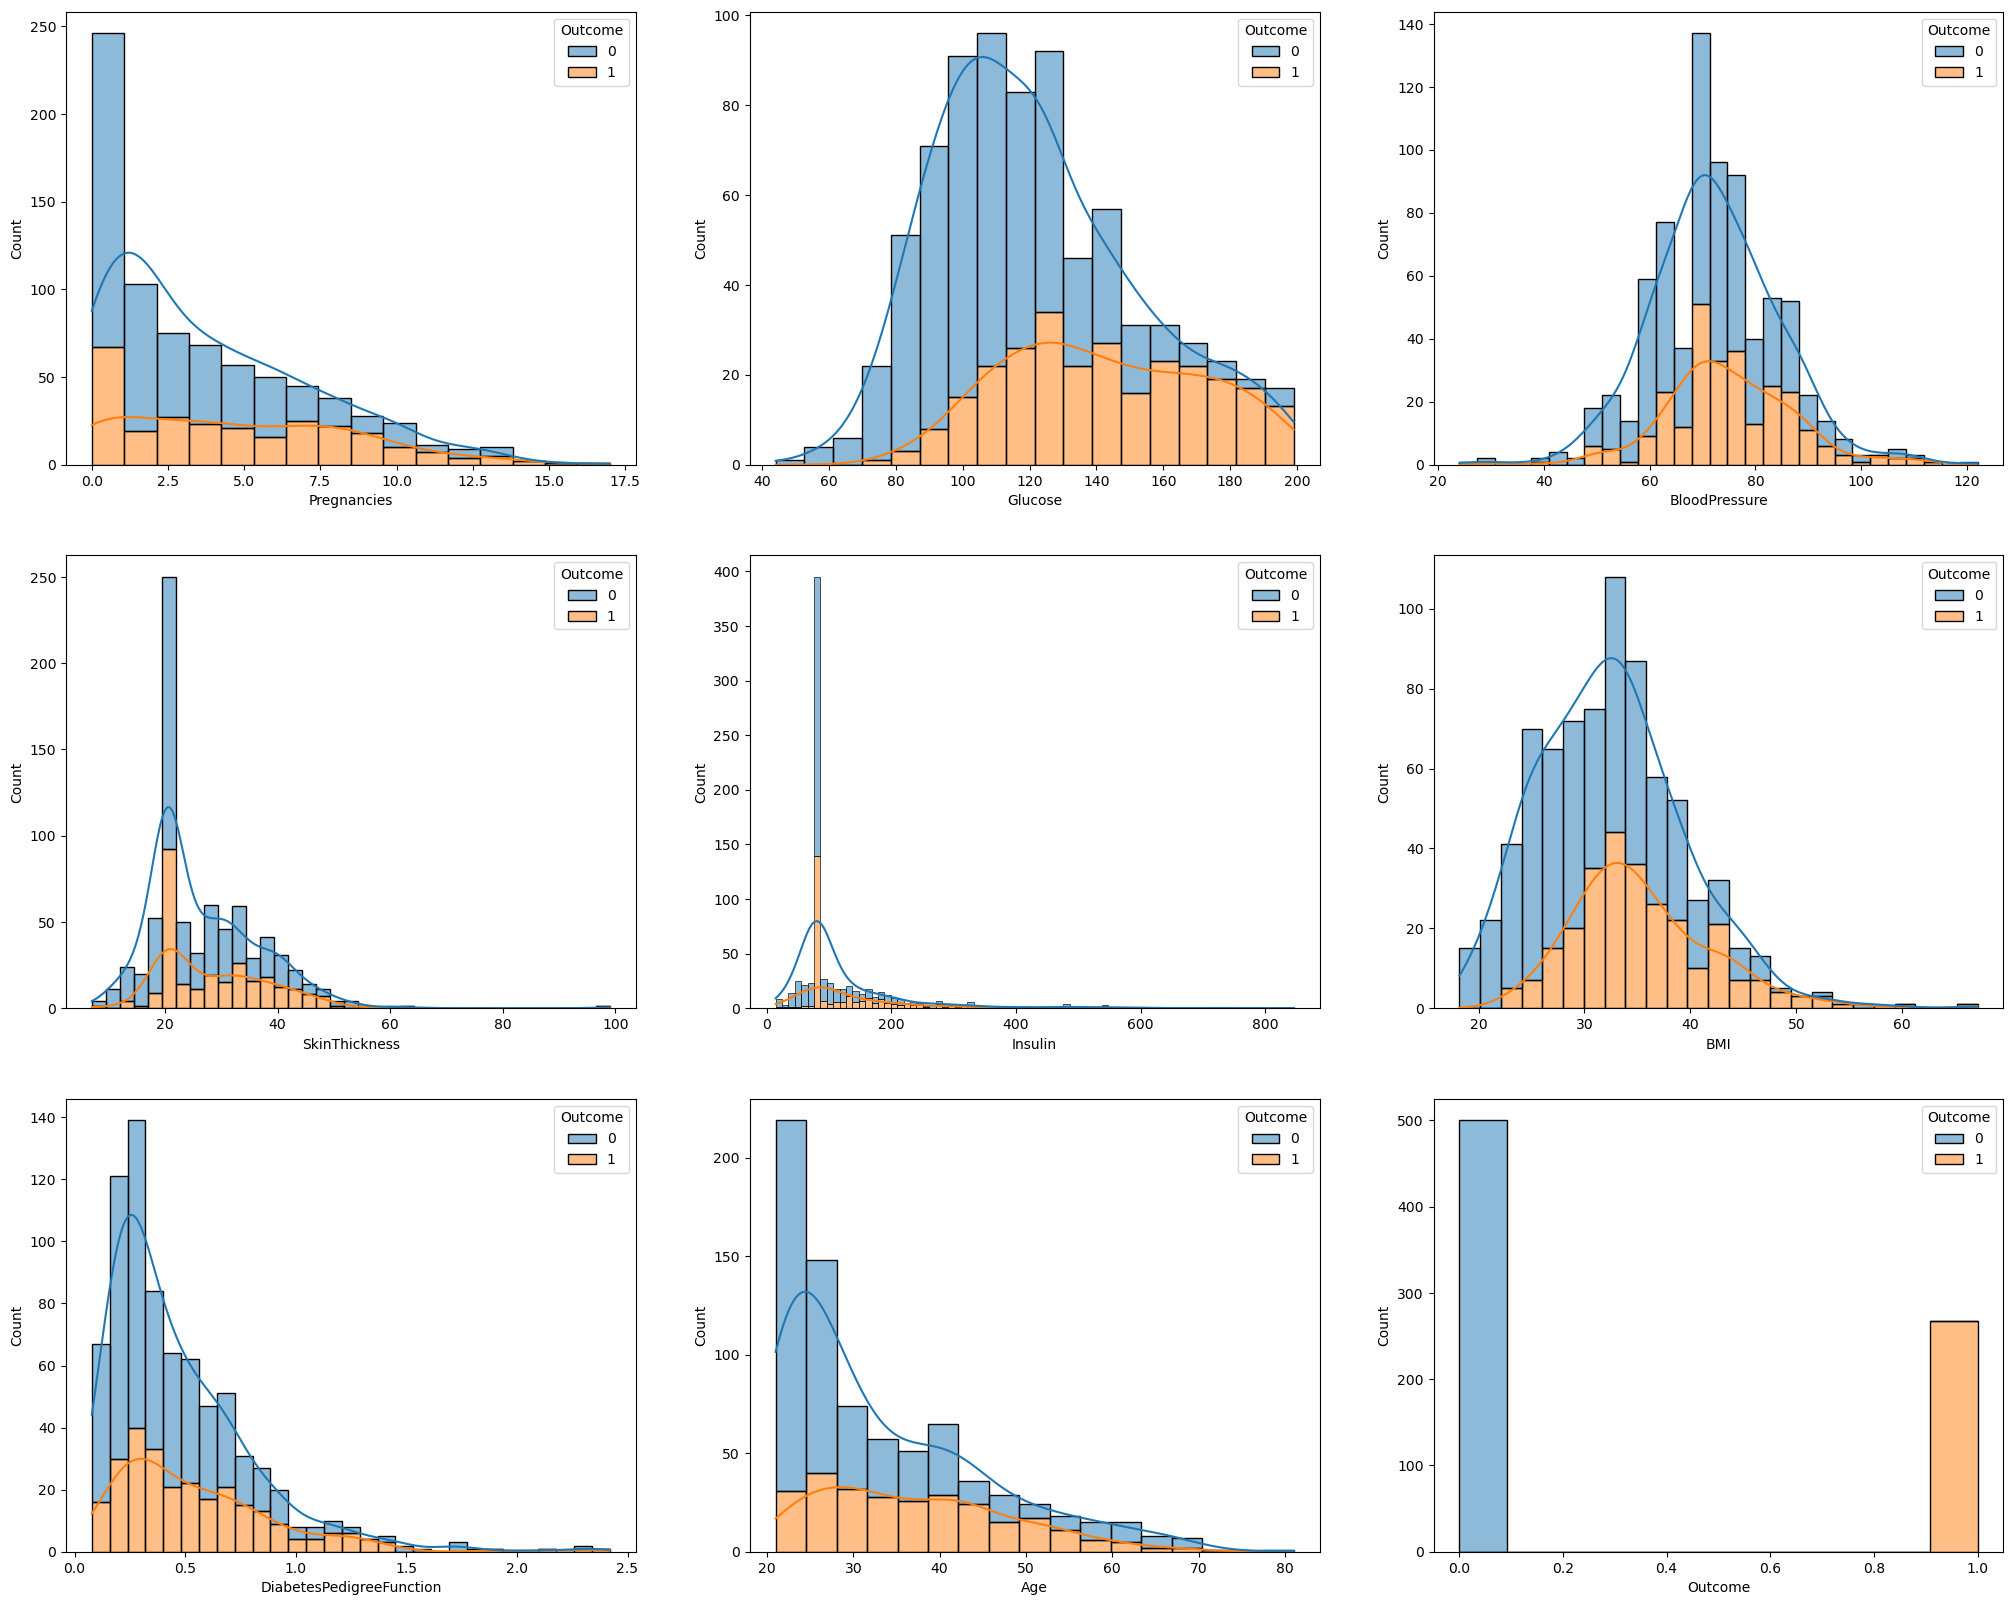

In [20]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=9:        
        ax=plt.subplot(3,3,plotnumber)       
        sns.histplot(df, x=df[column],kde=True,hue='Outcome', multiple='stack')
    plotnumber+=1
plt.show()

##### 4.1.3: Scatter Plot

In [21]:
#scatter_matrix(df, figsize=(20,20));
#plt.show()

##### 4.1.4: Pair Plot

In [22]:
#sns.pairplot(data = df, hue = 'Outcome' )
#plt.show()

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


##### 4.1.5: Analyzing correlation between variables(Correlation Matrix)

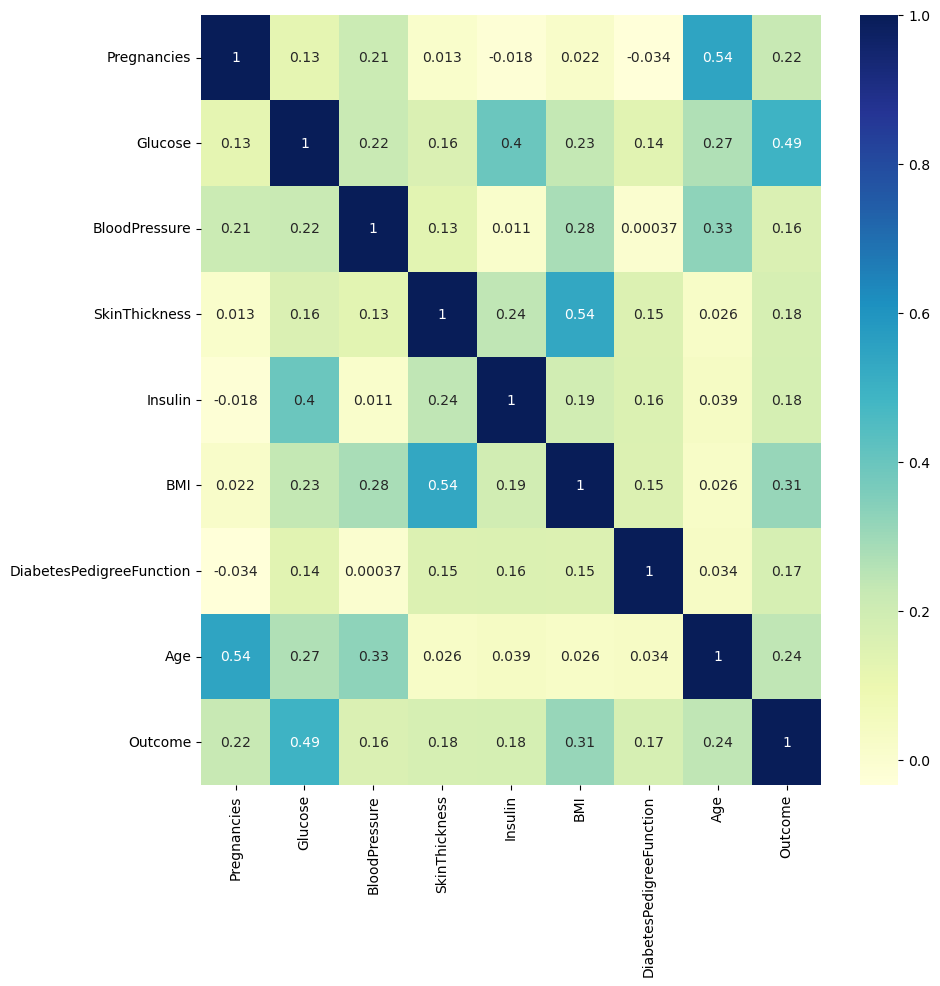

In [24]:
corrmat= df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

##### 4.1.6: Box Plot

<Axes: >

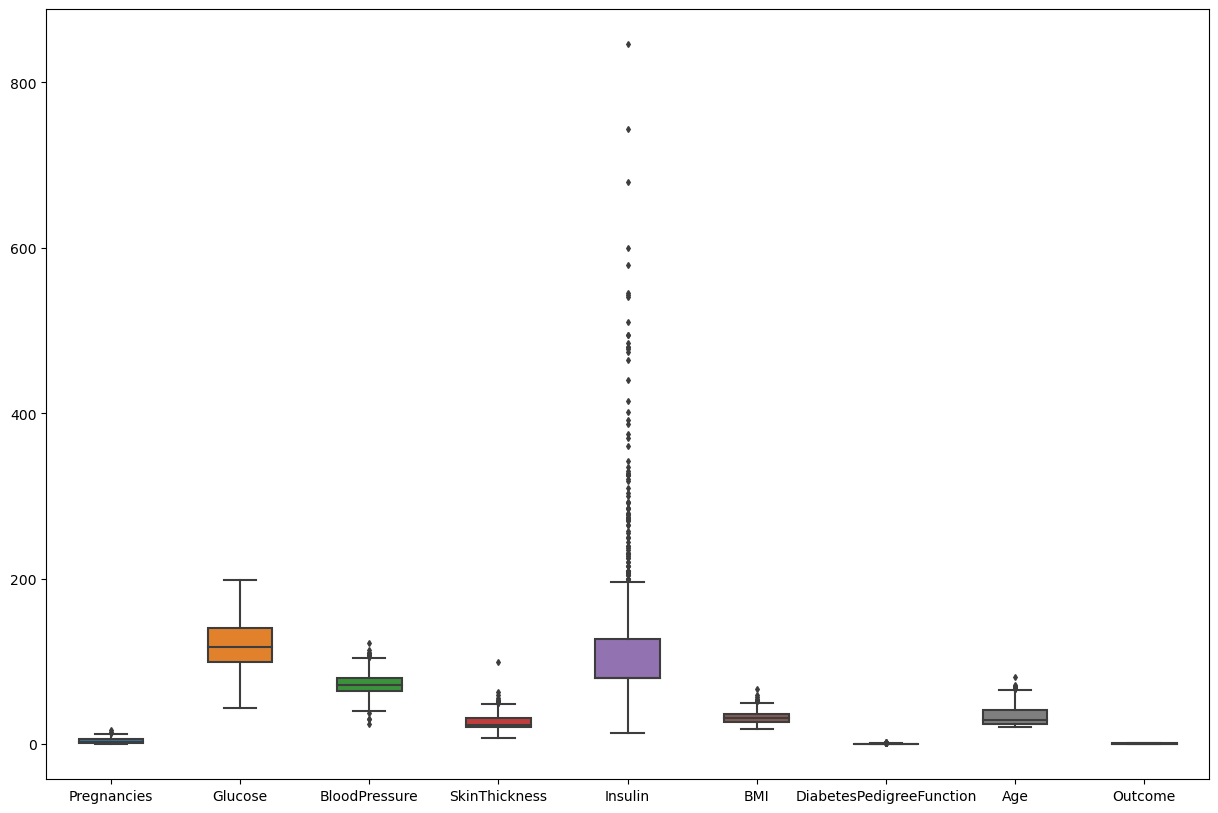

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

### 4.2: Data Cleaning

In [26]:
df.shape

(768, 9)

In [27]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
dfc  = data_cleaned[data_cleaned['Age']<q]

In [28]:
dfc.shape

(674, 9)

In [29]:
dfc.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.602374,119.217318,71.994622,25.721354,101.061453,31.904204,0.447338,32.454006,0.327893
std,3.011478,29.272890,11.891728,8.507237,49.005425,6.384238,0.285170,10.964692,0.469794
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.500000,72.000000,22.000000,79.799479,31.992578,0.356000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,111.500000,35.800000,0.600000,39.000000,1.000000
max,11.000000,199.000000,122.000000,49.000000,291.000000,50.000000,1.476000,66.000000,1.000000


In [30]:
diabetic = dfc[df['Outcome']==1]
non_diabetic = dfc[df['Outcome']==0]
diabetic.shape, non_diabetic.shape

((221, 9), (453, 9))

### 4.3: Data visualization after cleaning

##### 4.3.1: Pie Chart and Count Plot

Negative(0): 453
Positive(1): 221


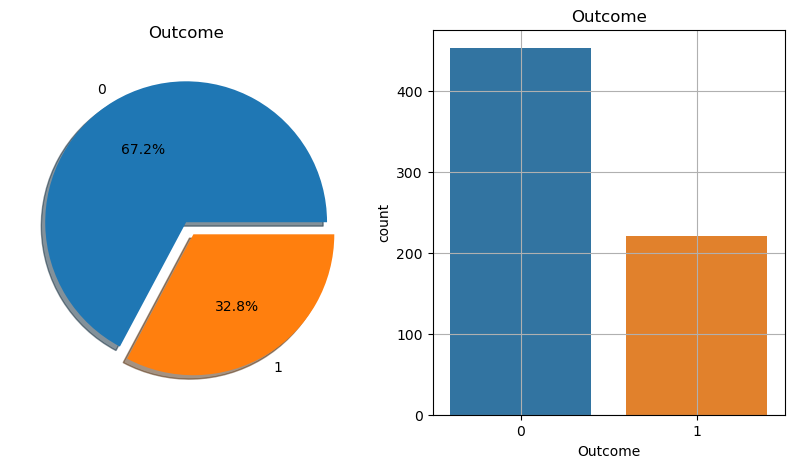

In [31]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart on the first subplot
dfc['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Plot countplot on the second subplot
sns.countplot(x='Outcome', data=dfc, ax=ax[1])
ax[1].set_title('Outcome')

# Count the number of Negative (0) and Positive (1) outcomes
N, P = dfc['Outcome'].value_counts()
print('Negative(0):', N)
print('Positive(1):', P)

plt.grid()
plt.show()

##### 4.3.2: Histogram

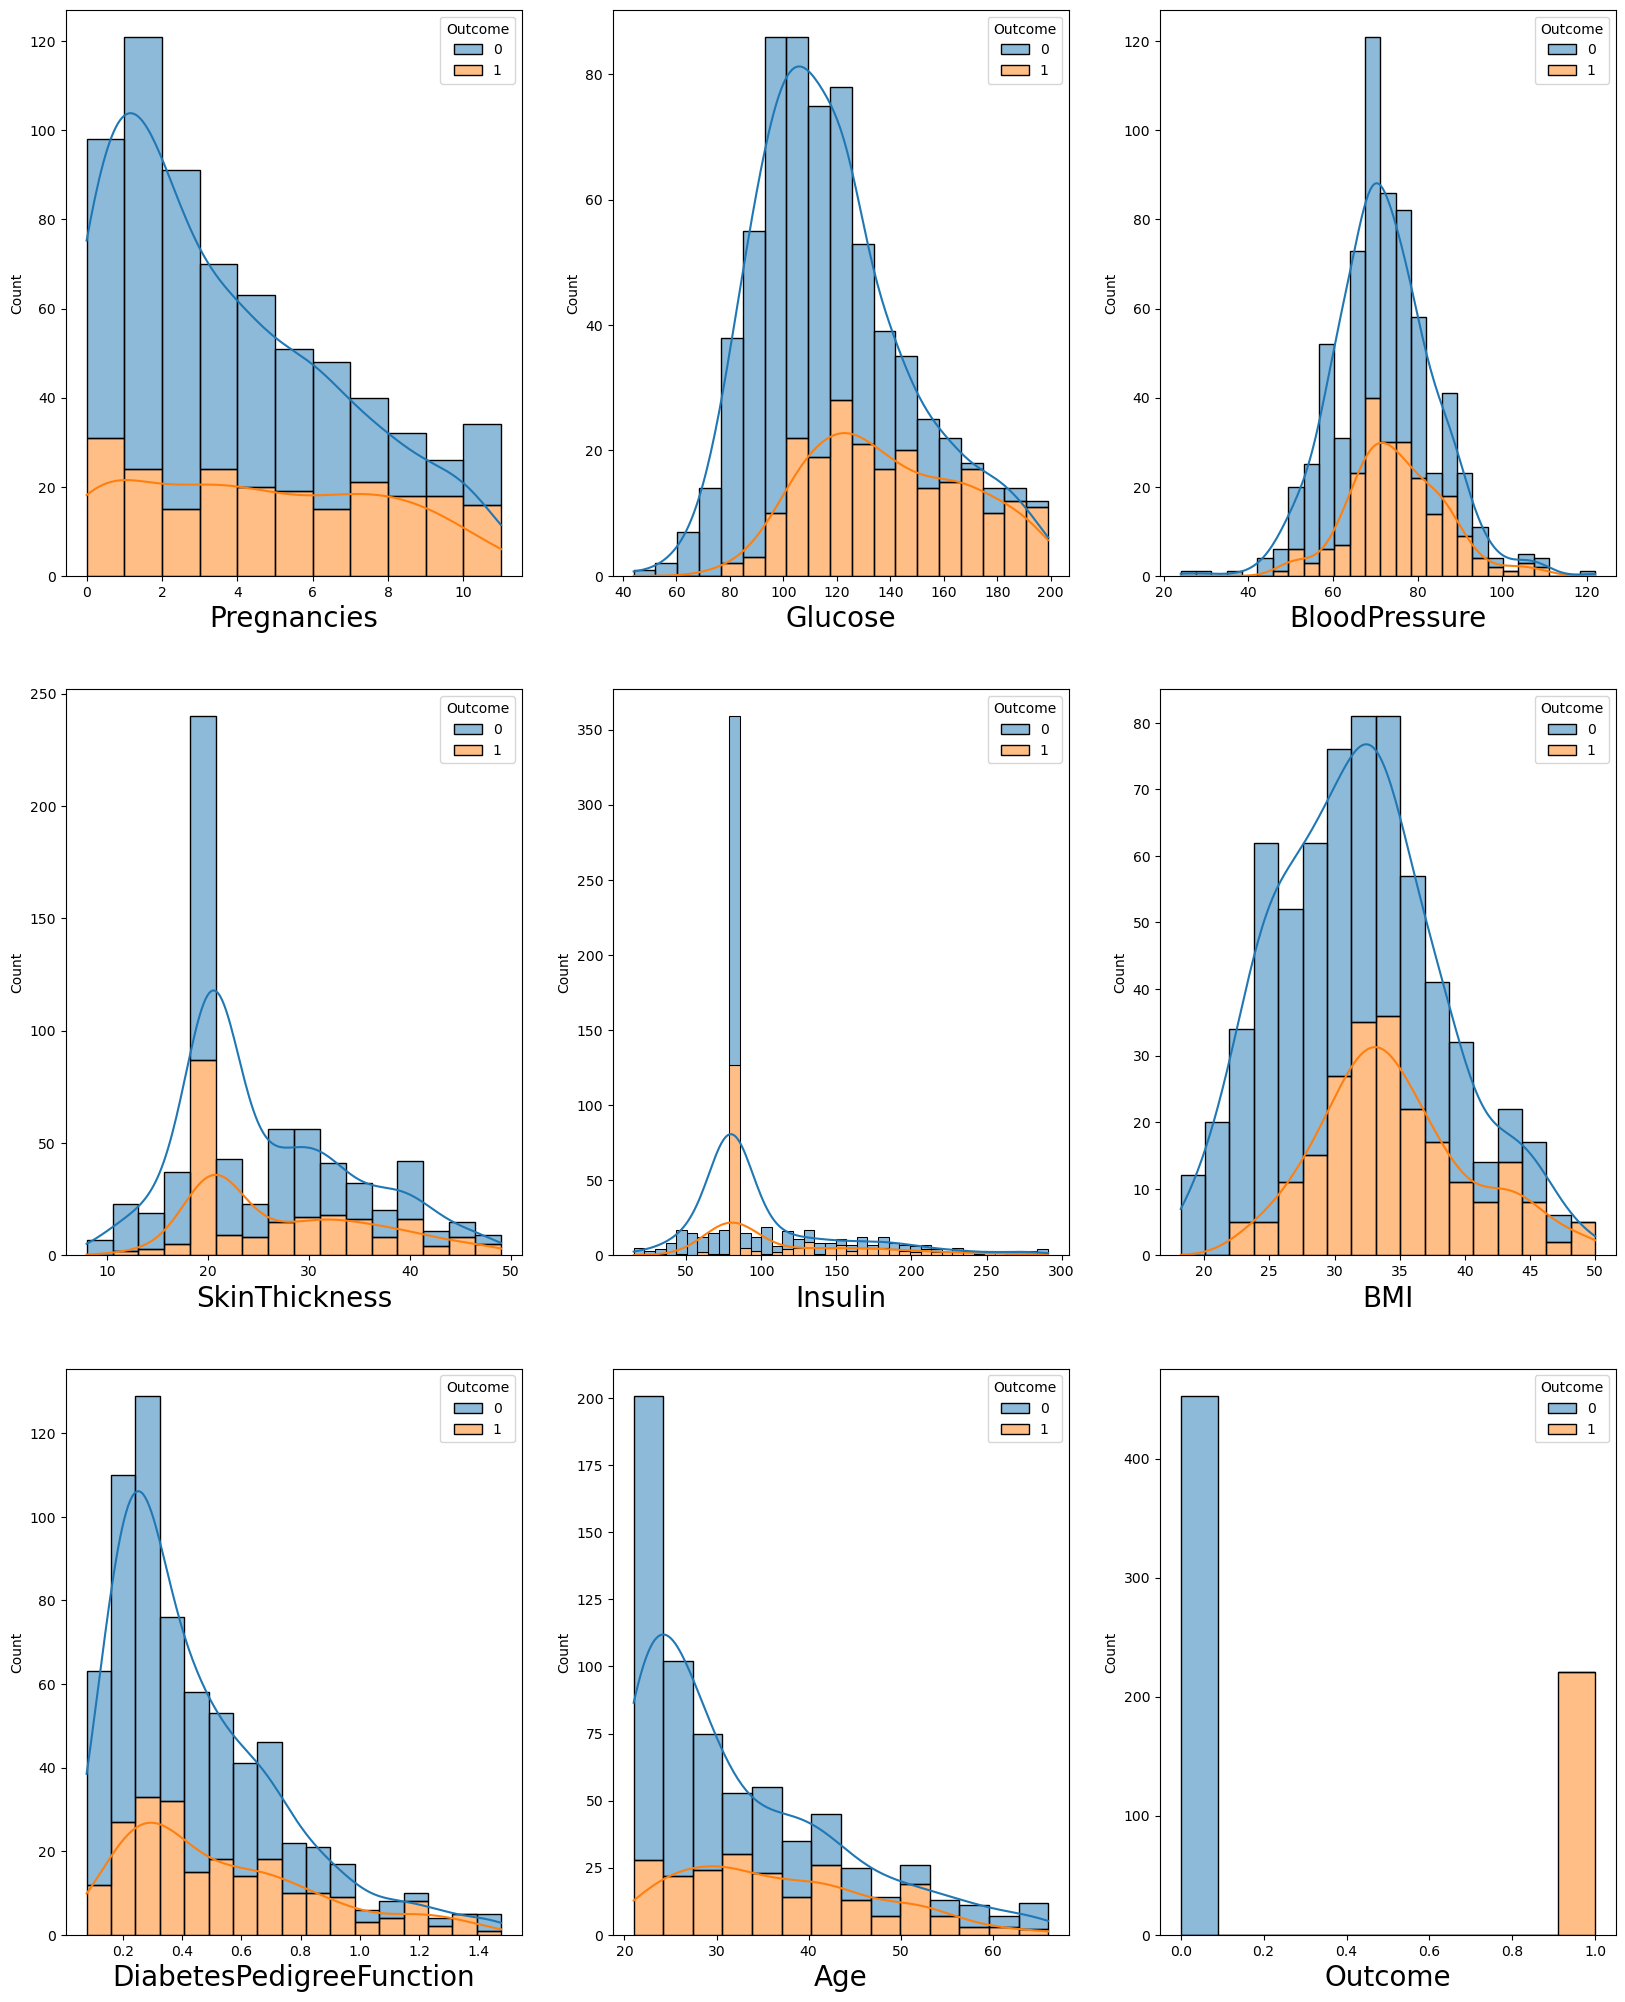

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(dfc, x=dfc[column], hue="Outcome", multiple='stack', kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### 4.3.3: Scatter Plot

In [33]:
#scatter_matrix(dfc, figsize=(20,20));
#plt.show()

##### 4.3.4: Pair Plot

In [34]:
#sns.pairplot(data = dfc, hue = 'Outcome' )
#plt.show()

##### 4.3.5: Analyzing correlation between variables(Correlation Matrix)

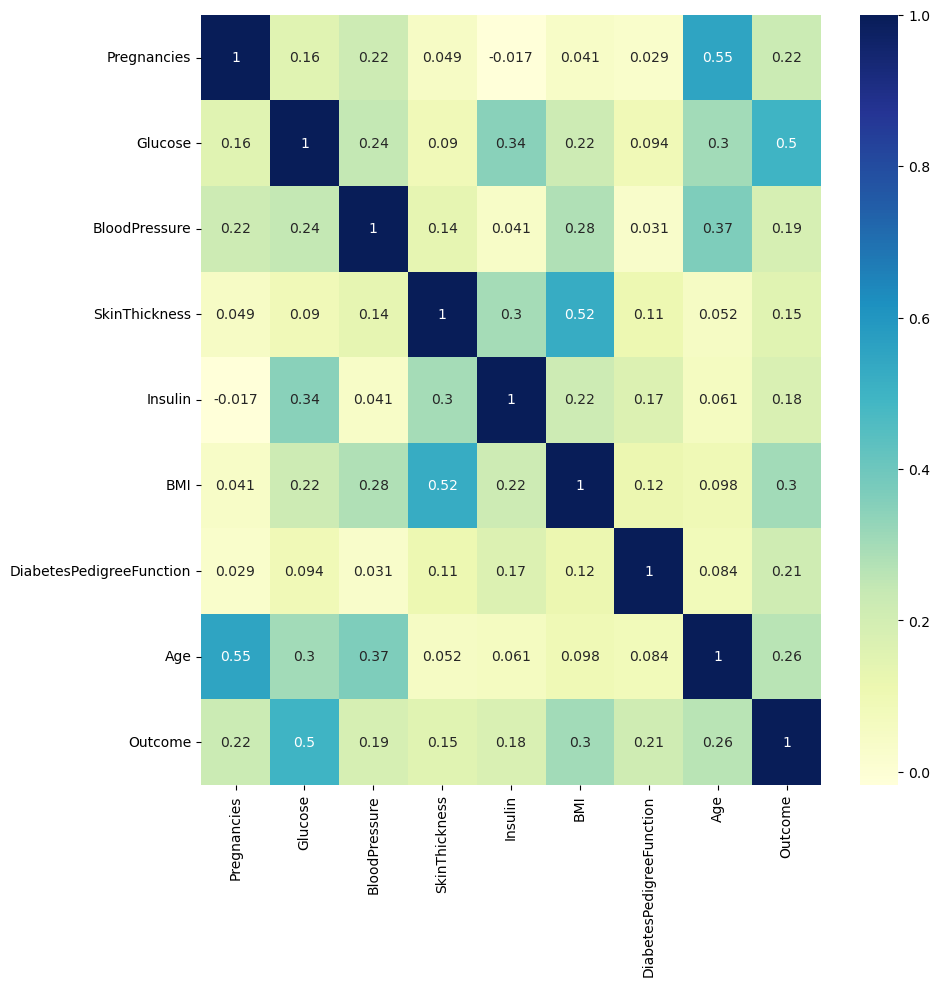

In [35]:
corrmat= dfc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g= sns.heatmap(dfc[top_corr_features].corr(),annot=True,cmap="YlGnBu")

##### 4.3.6: Box Plot

<Axes: >

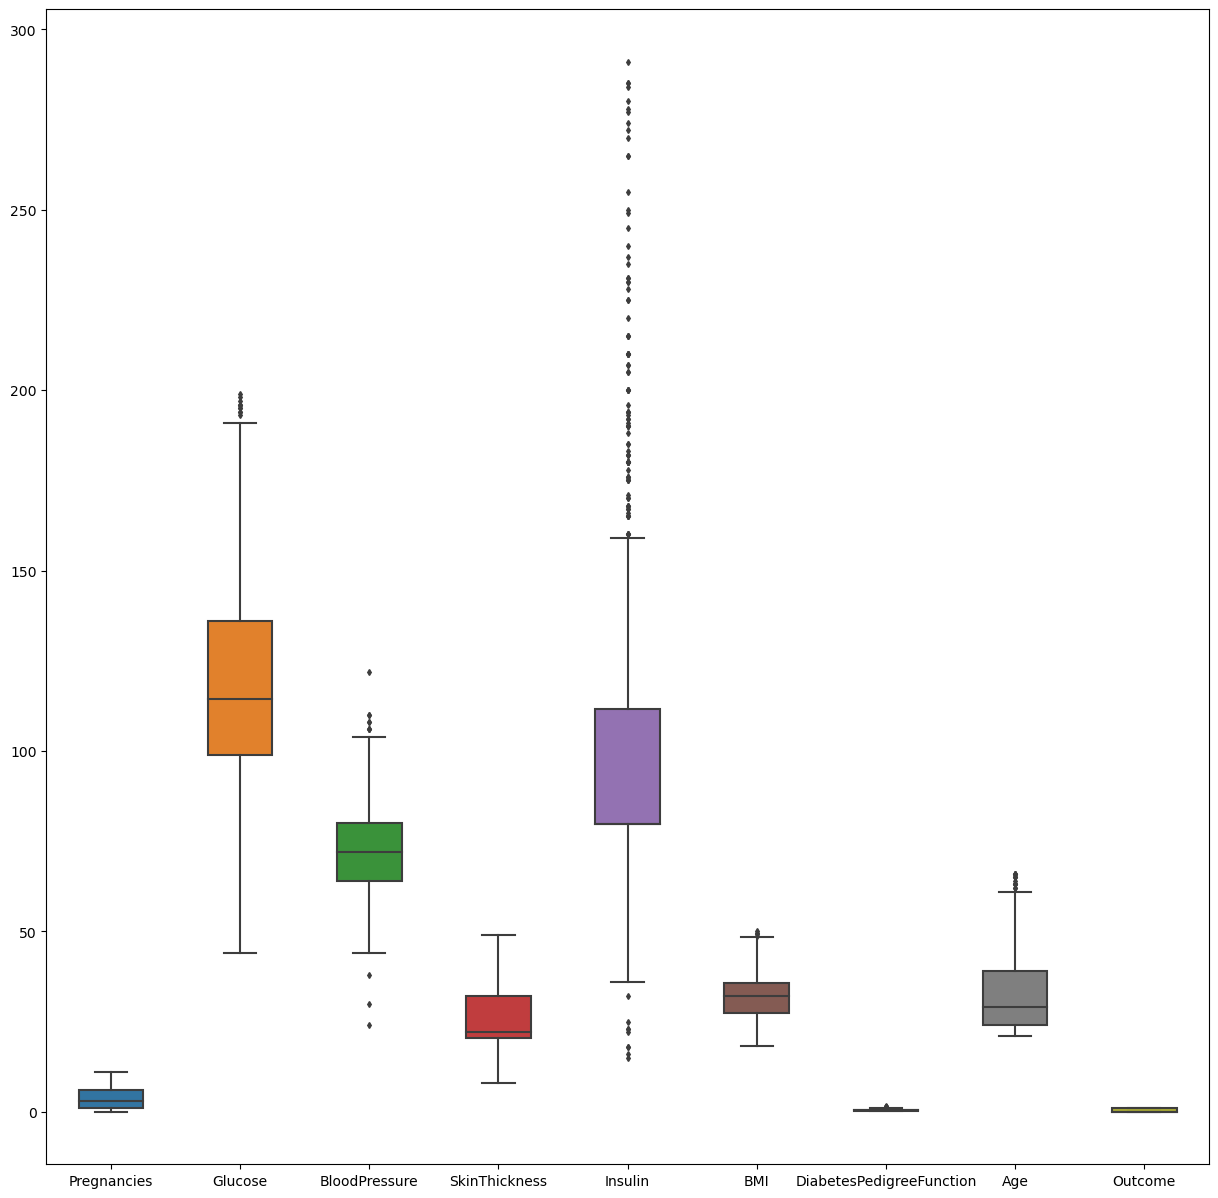

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

# Step5: SPLIT THE DATA FRAME INTO X AND y

In [37]:
target_name = 'Outcome'
y= dfc[target_name]
X= dfc.drop(target_name, axis=1)

In [38]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [39]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

# STEP6: APPLY FEATURE SCALING
Standardization scales the features such that they have a mean of 0 and a standard deviation of 1. The formula for standardization is: z = (x - mean) / standard deviation, where z is the standardized value, x is the original value, mean is the mean of the feature, and standard deviation is the standard deviation of the feature. Standardization is commonly used when the features have different scales and you want to bring them to a common scale to avoid the dominance of one feature over another in certain machine learning algorithms.

In [40]:
scaler = StandardScaler()
scaler.fit(X)
SSX= scaler.transform(X)

In [41]:
SSX

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(SSX,i) for i in range(SSX.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

# STEP7: TRAIN-TEST SPLIT

In [42]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.25, random_state=355)

In [43]:
X_train.shape, y_train.shape

((505, 8), (505,))

In [44]:
X_test.shape, y_test.shape

((169, 8), (169,))

# STEP8: BUILDING THE CLASSIFICATION ALGORITHM

### 8.1: Logistic Regression

In [45]:
lr= LogisticRegression(max_iter=100) #ekhane max_iter hocche epochs. default hocce 100. #random state none
lr.fit(X_train, y_train)

LogisticRegression()

### 8.2: KNeighbours Classifier(KNN)

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 8.3: Naive-Bayes Classifier

In [47]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 8.4: Support Vector Machine (SVM)

In [48]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

### 8.5: Decision Tree (DT)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 8.6: Random Forest (RF)

In [50]:
rf = RandomForestClassifier(criterion='entropy') # random state default (none)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Entropy (criterion='entropy'): It measures the level of disorder or randomness in the set of data points. It is based on the concept of information theory. A lower entropy indicates better purity.

### 8.7: GradientBoostingClassifier

In [51]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### 8.8: AdaBoost Classifier

In [52]:
adab = AdaBoostClassifier(n_estimators=50, random_state=42)
adab.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

### 8.9: Extreme Gradient Boosting Classifier (XgBoost)

In [53]:
xgb = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 8.10: LightGBM Classifier

In [54]:
lgbm = LGBMClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 169, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 505, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334653 -> initscore=-0.687212
[LightGBM] [Info] Start training from score -0.687212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=3, random_state=42)

### 8.11: CatBoost Classifier

In [55]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.0001, 
                        depth=7, 
                        random_seed=42, verbose=100)
cb.fit(X_train, y_train)

0:	learn: 0.6930911	total: 191ms	remaining: 3m 10s
100:	learn: 0.6872883	total: 966ms	remaining: 8.59s
200:	learn: 0.6815808	total: 1.75s	remaining: 6.95s
300:	learn: 0.6760117	total: 2.58s	remaining: 6s
400:	learn: 0.6705256	total: 3.38s	remaining: 5.04s
500:	learn: 0.6652875	total: 4.15s	remaining: 4.13s
600:	learn: 0.6600473	total: 4.97s	remaining: 3.3s
700:	learn: 0.6549695	total: 5.77s	remaining: 2.46s
800:	learn: 0.6500165	total: 6.58s	remaining: 1.64s
900:	learn: 0.6451938	total: 7.51s	remaining: 825ms
999:	learn: 0.6403895	total: 8.25s	remaining: 0us


### 8.12: Guassian Process Classifier

In [56]:
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

gpc.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

### 8.13: Multilayer Perceptron Classifier

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8,8,8,8,8)) #random state default(none)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8, 8))

# STEP9: MODEL PREDICTION

### 9.1: Making prediction on test by using LR

In [58]:
lr_predict= lr.predict(X_test)

### 9.2: Making prediction on test by using KNN

In [59]:
knn_predict= knn.predict(X_test)

### 9.3: Making prediction on test by using NB

In [60]:
nb_predict= nb.predict(X_test)

### 9.4: Making prediction on test by using SVM

In [61]:
sv_predict= sv.predict(X_test)

### 9.5: Making prediction on test by using DT

In [62]:
dt_predict= dt.predict(X_test)

### 9.6: Making prediction on test by using RF

In [63]:
rf_predict= rf.predict(X_test)

### 9.7: Making prediction on test using Gradient Boosting Classifier

In [64]:
gb_predict=gb.predict(X_test)

### 9.8: Making prediction on test using AdaBoost Classifier

In [65]:
adab_predict=adab.predict(X_test)

### 9.9: Making prediction on test using XGB Classifier

In [66]:
xgb_predict=xgb.predict(X_test)

### 9.10: Making prediction on test using LGBM Classifier

In [67]:
lgbm_predict=lgbm.predict(X_test)

### 9.11: Making prediction on test using Categorical Boosting Classifier

In [68]:
cb_predict=cb.predict(X_test)

### 9.12: Making prediction on test using Guassian Process Classifier

In [69]:
gpc_predict=gpc.predict(X_test)

### 9.13: Making prediction on test using MLP Classifier

In [70]:
mlp_predict= mlp.predict(X_test)

# STEP10: MODEL EVALUATION

### 10.1: Logistic Regression

##### Train score, Test score and Misclassification rate

In [71]:
print("Train accuracy of Logistic Regression: ", lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression: ", accuracy_score(y_test, lr_predict)*100)
print("Misclassification rate of Logistic Regression: ", 100-(accuracy_score(y_test, lr_predict)*100))

Train accuracy of Logistic Regression:  77.42574257425743
Accuracy (Test) score of Logistic Regression:  83.4319526627219
Misclassification rate of Logistic Regression:  16.568047337278102


##### Confusion Matrix and Classification Report

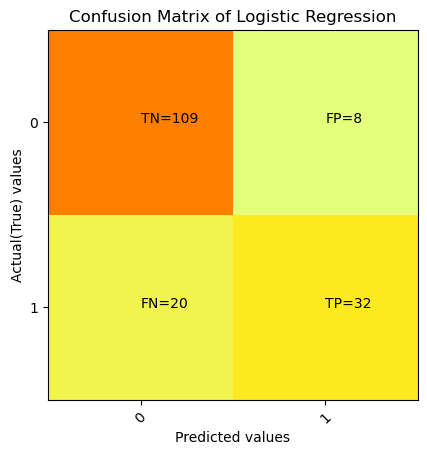

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8450    0.9316    0.8862       117
           1     0.8000    0.6154    0.6957        52

    accuracy                         0.8343       169
   macro avg     0.8225    0.7735    0.7909       169
weighted avg     0.8311    0.8343    0.8276       169



In [72]:
lrcm =confusion_matrix(y_test, lr_predict)
plt.clf()
plt.imshow(lrcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (lrcm[i][j]))
plt.show()

print('Classification report of Logistic Regression: \n',classification_report(y_test, lr_predict, digits=4))

##### ROC AUC Score

In [73]:
lrauc = roc_auc_score(y_test, lr_predict)
print("ROC AUC score of LR: ",lrauc)

ROC AUC score of LR:  0.7735042735042735


##### ROC Curve

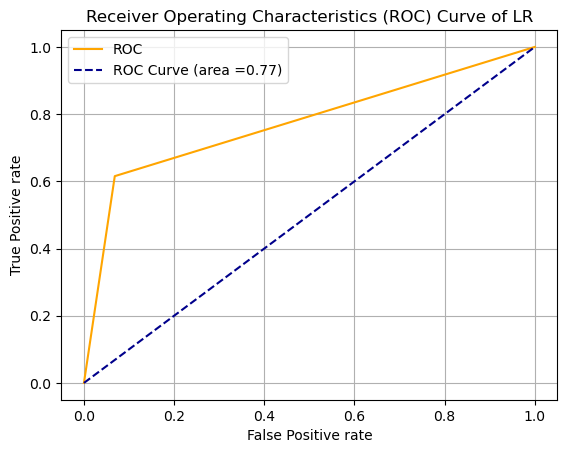

In [74]:
lrfpr, lrtpr, lrthresholds= roc_curve(y_test, lr_predict)
plt.plot(lrfpr, lrtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % lrauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of LR')
plt.legend()
plt.grid()
plt.show()

##### feature coefficient

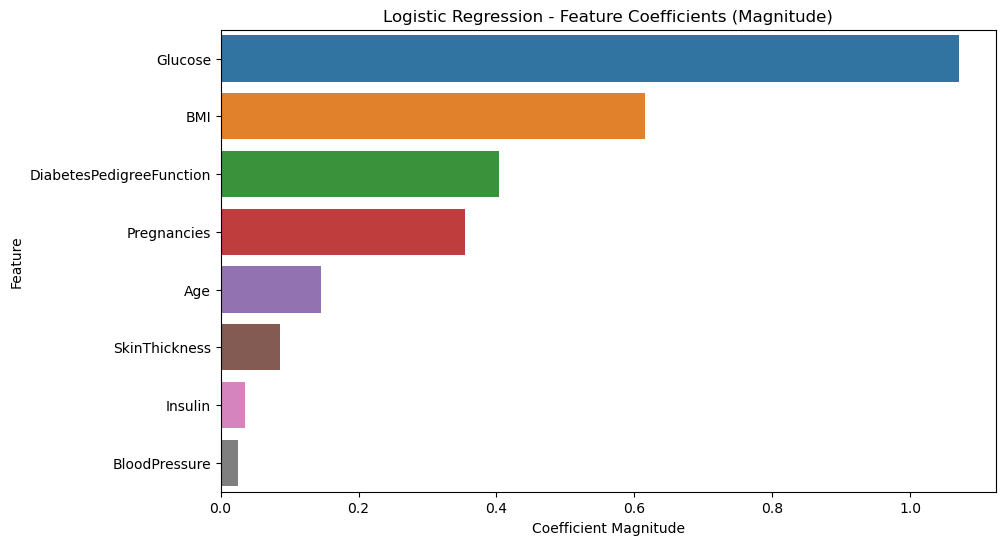

In [75]:
feature_coefficients = lr.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(feature_coefficients)})

# Sort the features by coefficient magnitude in descending order
feature_coefficient_df = feature_coefficient_df.sort_values(by='Coefficient', ascending=False)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficient_df)
plt.title('Logistic Regression - Feature Coefficients (Magnitude)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

### 10.2: K Nearest Neighbors

##### Train score, Test score and Misclassification rate

In [76]:
print("Train accuracy of KNN: ", knn.score(X_train, y_train)*100)
print("Accuracy (Test) score of KNN: ", accuracy_score(y_test, knn_predict)*100)
print("Misclassification rate of KNN: ", 100-(accuracy_score(y_test, knn_predict)*100))

Train accuracy of KNN:  82.57425742574257
Accuracy (Test) score of KNN:  76.92307692307693
Misclassification rate of KNN:  23.076923076923066


##### Confusion Matrix and Classification Report

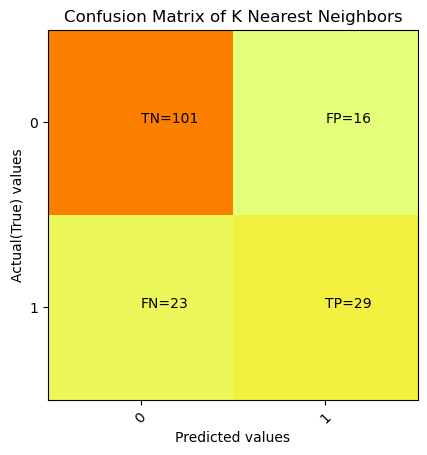

Classification report of KNN: 
               precision    recall  f1-score   support

           0     0.8145    0.8632    0.8382       117
           1     0.6444    0.5577    0.5979        52

    accuracy                         0.7692       169
   macro avg     0.7295    0.7105    0.7181       169
weighted avg     0.7622    0.7692    0.7643       169



In [77]:
knncm =confusion_matrix(y_test, knn_predict)
plt.clf()
plt.imshow(knncm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of K Nearest Neighbors')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (knncm[i][j]))
plt.show()

print('Classification report of KNN: \n',classification_report(y_test, knn_predict, digits=4))

##### ROC AUC Score

In [78]:
knnauc = roc_auc_score(y_test, knn_predict)
print("ROC AUC score of KNN: ",knnauc)

ROC AUC score of KNN:  0.7104700854700855


##### ROC Curve

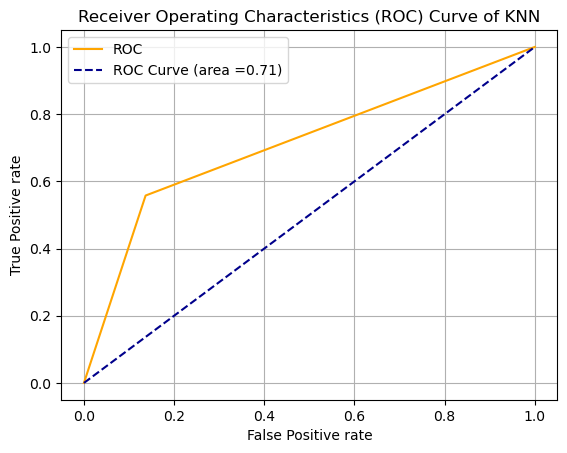

In [79]:
knnfpr, knntpr, knnthresholds= roc_curve(y_test, knn_predict)
plt.plot(knnfpr, knntpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % knnauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of KNN')
plt.legend()
plt.grid()
plt.show()

### 10.3: Naive-Bayes

##### Train score, Test score and Misclassification rate

In [80]:
print("Train accuracy of NB: ", nb.score(X_train, y_train)*100)
print("Accuracy (Test) score of NB: ", accuracy_score(y_test, nb_predict)*100)
print("Misclassification rate of NB: ", 100-(accuracy_score(y_test, nb_predict)*100))

Train accuracy of NB:  76.23762376237624
Accuracy (Test) score of NB:  76.33136094674556
Misclassification rate of NB:  23.668639053254438


##### Confusion Matrix and Classification Report

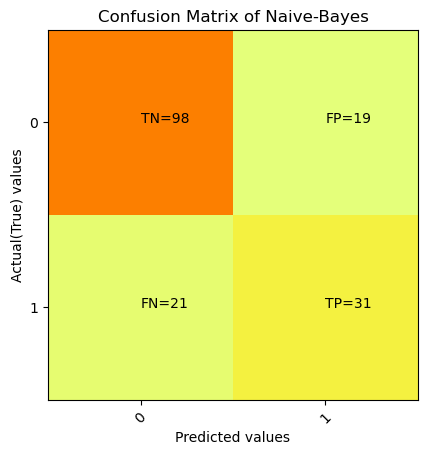

Classification report of Naive-Bayes: 
               precision    recall  f1-score   support

           0     0.8235    0.8376    0.8305       117
           1     0.6200    0.5962    0.6078        52

    accuracy                         0.7633       169
   macro avg     0.7218    0.7169    0.7192       169
weighted avg     0.7609    0.7633    0.7620       169



In [81]:
nbcm =confusion_matrix(y_test, nb_predict)
plt.clf()
plt.imshow(nbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Naive-Bayes')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (nbcm[i][j]))
plt.show()

print('Classification report of Naive-Bayes: \n',classification_report(y_test, nb_predict, digits=4))

##### ROC AUC Score

In [82]:
nbauc = roc_auc_score(y_test, nb_predict)
print("ROC AUC score of NB: ",nbauc)

ROC AUC score of NB:  0.716880341880342


##### ROC Curve

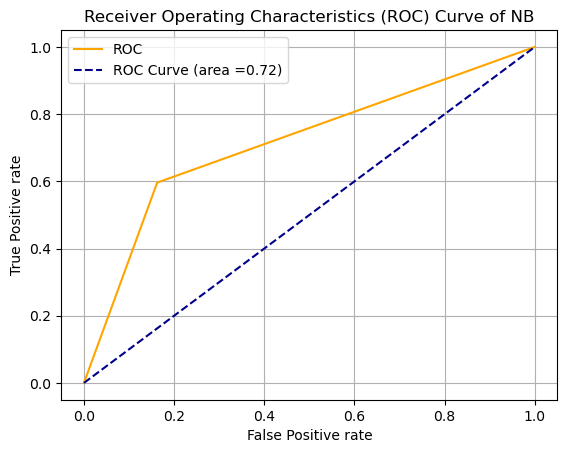

In [83]:
nbfpr, nbtpr, nbthresholds= roc_curve(y_test, nb_predict)
plt.plot(nbfpr, nbtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % nbauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of NB')
plt.legend()
plt.grid()
plt.show()

### 10.4: Support Vector Machine

##### Train score, Test score and Misclassification rate

In [84]:
print("Train accuracy of SVM: ", sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM: ", accuracy_score(y_test, sv_predict)*100)
print("Misclassification rate of SVM: ", 100-(accuracy_score(y_test, sv_predict)*100))

Train accuracy of SVM:  83.76237623762376
Accuracy (Test) score of SVM:  80.4733727810651
Misclassification rate of SVM:  19.526627218934905


##### Confusion Matrix and Classification Report

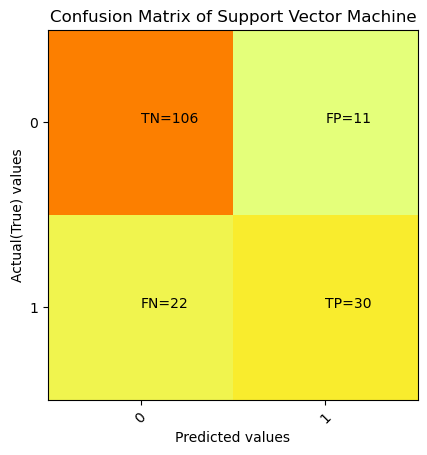

Classification report of Support Vector Machine: 
               precision    recall  f1-score   support

           0     0.8281    0.9060    0.8653       117
           1     0.7317    0.5769    0.6452        52

    accuracy                         0.8047       169
   macro avg     0.7799    0.7415    0.7552       169
weighted avg     0.7985    0.8047    0.7976       169



In [85]:
svcm =confusion_matrix(y_test, sv_predict)
plt.clf()
plt.imshow(svcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Support Vector Machine')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (svcm[i][j]))
plt.show()

print('Classification report of Support Vector Machine: \n',classification_report(y_test, sv_predict, digits=4))

##### ROC AUC Score

In [86]:
svauc = roc_auc_score(y_test, sv_predict)
print("ROC AUC score of SVM: ",svauc)

ROC AUC score of SVM:  0.7414529914529914


##### ROC Curve

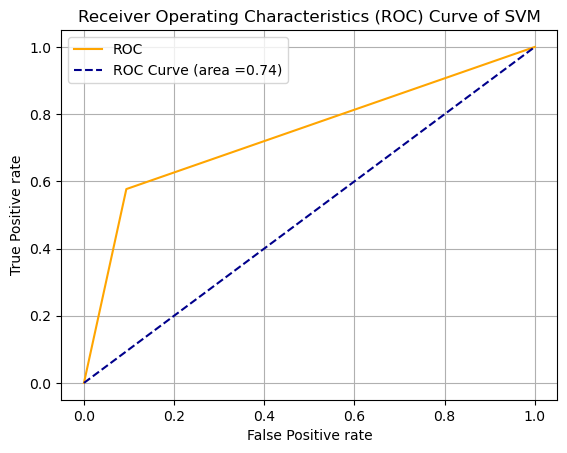

In [87]:
svfpr, svtpr, svthresholds= roc_curve(y_test, sv_predict)
plt.plot(svfpr, svtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % svauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of SVM')
plt.legend()
plt.grid()
plt.show()

### 10.5: Decision Tree

##### Train score, Test score and Misclassification rate

In [88]:
print("Train accuracy of DT: ", dt.score(X_train, y_train)*100)
print("Accuracy (Test) score of DT: ", accuracy_score(y_test, dt_predict)*100)
print("Misclassification rate of DT: ", 100-(accuracy_score(y_test, dt_predict)*100))

Train accuracy of DT:  100.0
Accuracy (Test) score of DT:  65.08875739644971
Misclassification rate of DT:  34.91124260355029


##### Confusion Matrix and Classification Report

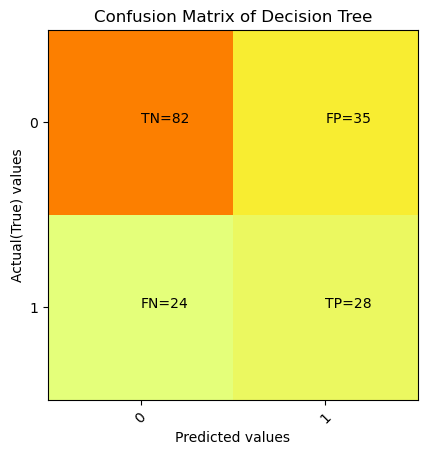

Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.7736    0.7009    0.7354       117
           1     0.4444    0.5385    0.4870        52

    accuracy                         0.6509       169
   macro avg     0.6090    0.6197    0.6112       169
weighted avg     0.6723    0.6509    0.6590       169



In [89]:
dtcm =confusion_matrix(y_test, dt_predict)
plt.clf()
plt.imshow(dtcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (dtcm[i][j]))
plt.show()

print('Classification report of Decision Tree: \n',classification_report(y_test, dt_predict, digits=4))

##### ROC AUC Score

In [90]:
dtauc = roc_auc_score(y_test, dt_predict)
print("ROC AUC score of DT: ",dtauc)

ROC AUC score of DT:  0.6196581196581196


##### ROC Curve

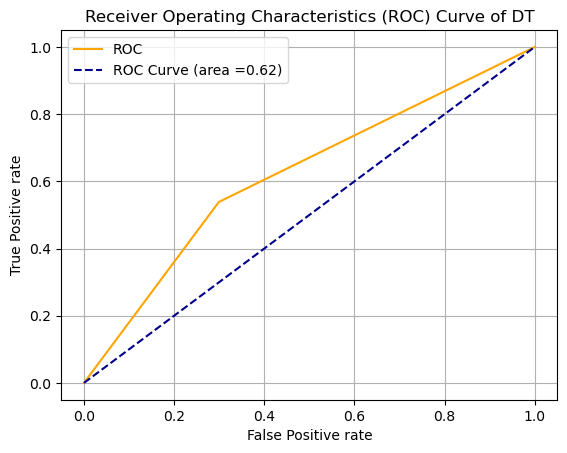

In [91]:
dtfpr, dttpr, dtthresholds= roc_curve(y_test, dt_predict)
plt.plot(dtfpr, dttpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % dtauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of DT')
plt.legend()
plt.grid()
plt.show()

### 10.6: Random Forest

##### Train score, Test score and Misclassification rate

In [92]:
print("Train accuracy of RF: ", rf.score(X_train, y_train)*100)
print("Accuracy (Test) score of RF: ", accuracy_score(y_test, rf_predict)*100)
print("Misclassification rate of RF: ", 100-(accuracy_score(y_test, rf_predict)*100))

Train accuracy of RF:  100.0
Accuracy (Test) score of RF:  82.24852071005917
Misclassification rate of RF:  17.751479289940832


##### Confusion Matrix and Classification Report

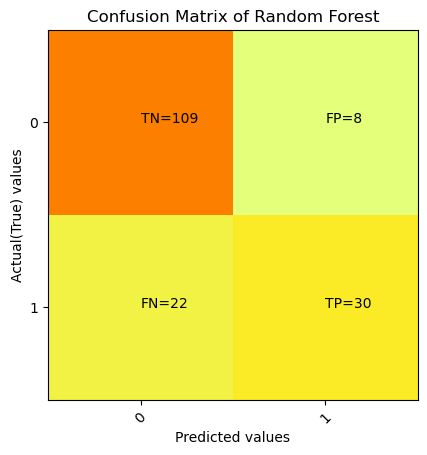

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0     0.8321    0.9316    0.8790       117
           1     0.7895    0.5769    0.6667        52

    accuracy                         0.8225       169
   macro avg     0.8108    0.7543    0.7728       169
weighted avg     0.8190    0.8225    0.8137       169



In [93]:
rfcm =confusion_matrix(y_test, rf_predict)
plt.clf()
plt.imshow(rfcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (rfcm[i][j]))
plt.show()

print('Classification report of Random Forest: \n',classification_report(y_test, rf_predict, digits=4))

##### ROC AUC Score

In [94]:
rfauc = roc_auc_score(y_test, rf_predict)
print("ROC AUC score of RF: ",rfauc)

ROC AUC score of RF:  0.7542735042735043


##### ROC Curve

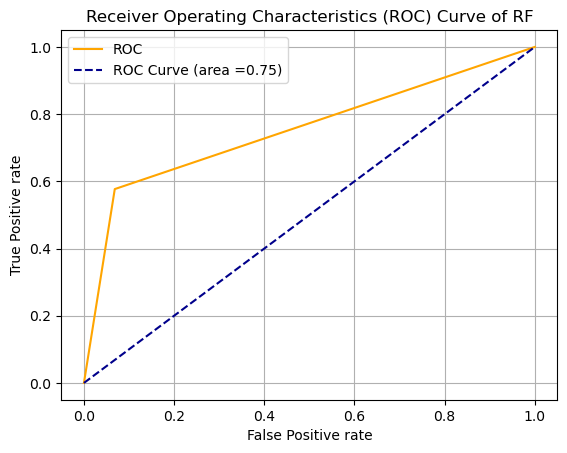

In [95]:
rffpr, rftpr, rfthresholds= roc_curve(y_test, rf_predict)
plt.plot(rffpr, rftpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % rfauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of RF')
plt.legend()
plt.grid()
plt.show()

##### Feature importance

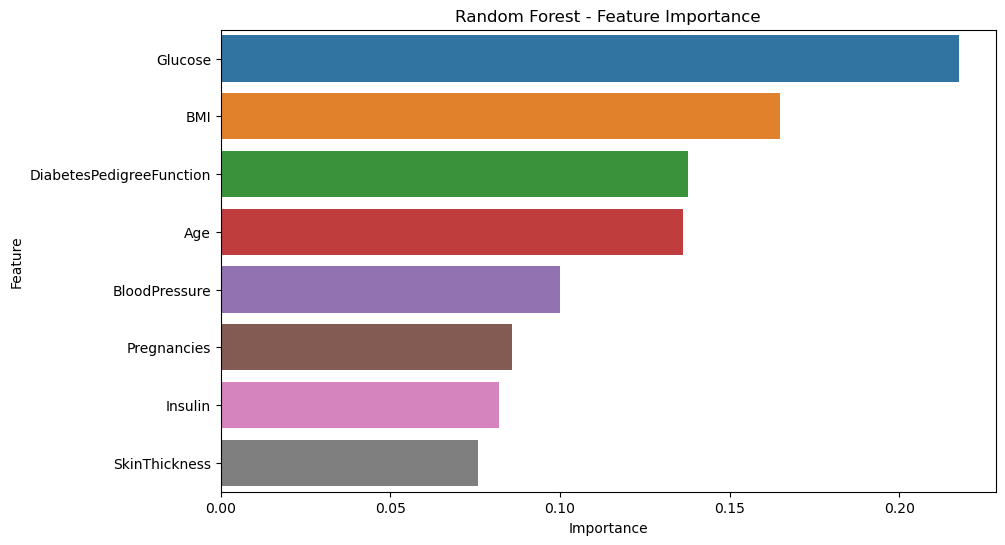

In [96]:
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 10.7: Gradient Boosting Classifier

##### Train score, Test score and Misclassification rate

In [97]:
print("Train accuracy of Gradient Boosting Classifier : ", gb.score(X_train, y_train)*100)
print("Accuracy (Test) score of Gradient Boosting Classifier: ", accuracy_score(y_test, gb_predict)*100)
print("Misclassification rate of Gradient Boosting Classifier: ", 100-(accuracy_score(y_test, gb_predict)*100))

Train accuracy of Gradient Boosting Classifier :  94.45544554455445
Accuracy (Test) score of Gradient Boosting Classifier:  82.84023668639054
Misclassification rate of Gradient Boosting Classifier:  17.15976331360946


##### Confusion Matrix and Classification Report

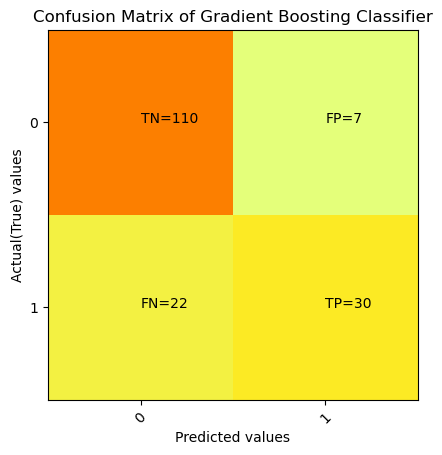

Classification report of Gradient Boosting Classifer: 
               precision    recall  f1-score   support

           0     0.8333    0.9402    0.8835       117
           1     0.8108    0.5769    0.6742        52

    accuracy                         0.8284       169
   macro avg     0.8221    0.7585    0.7788       169
weighted avg     0.8264    0.8284    0.8191       169



In [98]:
gbcm =confusion_matrix(y_test, gb_predict)
plt.clf()
plt.imshow(gbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (gbcm[i][j]))
plt.show()

print('Classification report of Gradient Boosting Classifer: \n',classification_report(y_test, gb_predict, digits=4))

##### ROC AUC Score

In [99]:
gbauc = roc_auc_score(y_test, gb_predict)
print("ROC AUC score of GBC: ",gbauc)

ROC AUC score of GBC:  0.7585470085470085


##### ROC Curve

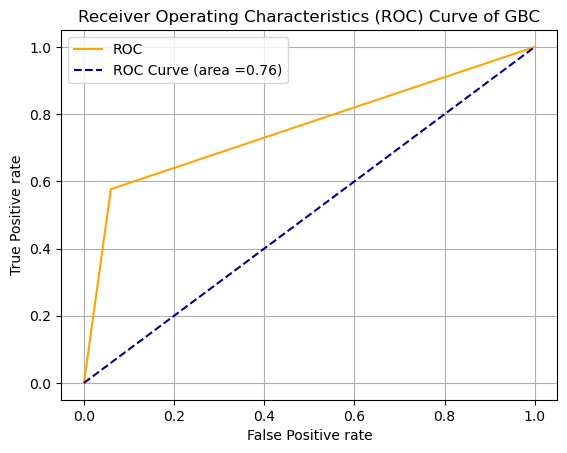

In [100]:
gbfpr, gbtpr, gbthresholds= roc_curve(y_test, gb_predict)
plt.plot(gbfpr, gbtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % gbauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of GBC')
plt.legend()
plt.grid()
plt.show()

### 10.8: AdaBoost Classifier

##### Train score, Test score and Misclassification rate

In [101]:
print("Train accuracy of AdaBoost Classifier : ", adab.score(X_train, y_train)*100)
print("Accuracy (Test) score of AdaBoost Classifier: ", accuracy_score(y_test, adab_predict)*100)
print("Misclassification rate of AdaBoost Classifier: ", 100-(accuracy_score(y_test, adab_predict)*100))

Train accuracy of AdaBoost Classifier :  83.76237623762376
Accuracy (Test) score of AdaBoost Classifier:  80.4733727810651
Misclassification rate of AdaBoost Classifier:  19.526627218934905


##### Confusion Matrix and Classification Report

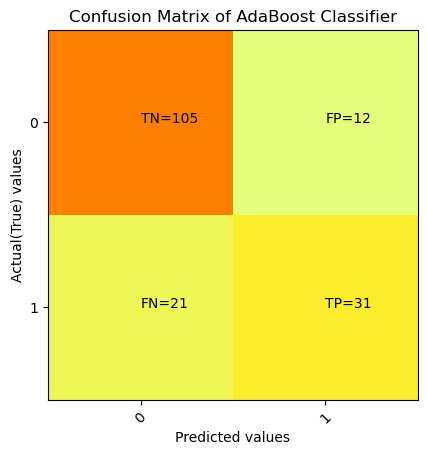

Classification report of AdaBoost Classifer: 
               precision    recall  f1-score   support

           0     0.8333    0.8974    0.8642       117
           1     0.7209    0.5962    0.6526        52

    accuracy                         0.8047       169
   macro avg     0.7771    0.7468    0.7584       169
weighted avg     0.7987    0.8047    0.7991       169



In [102]:
adabcm =confusion_matrix(y_test, adab_predict)
plt.clf()
plt.imshow(adabcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (adabcm[i][j]))
plt.show()

print('Classification report of AdaBoost Classifer: \n',classification_report(y_test, adab_predict, digits=4))

##### ROC AUC Score

In [103]:
adabauc = roc_auc_score(y_test, adab_predict)
print("ROC AUC score of GBC: ",adabauc)

ROC AUC score of GBC:  0.7467948717948719


##### ROC Curve

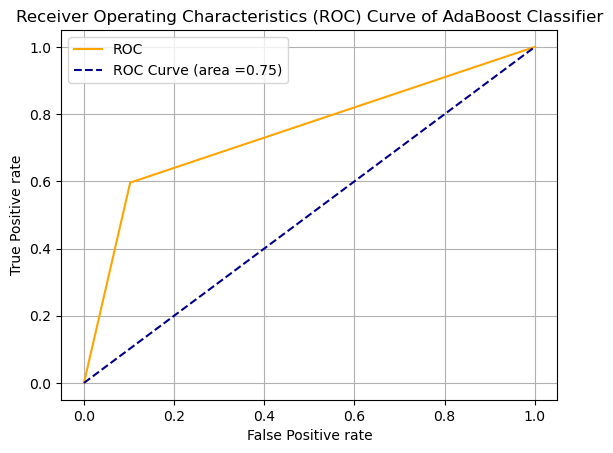

In [104]:
adabfpr, adabtpr, adabthresholds= roc_curve(y_test, adab_predict)
plt.plot(adabfpr, adabtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % adabauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of AdaBoost Classifier')
plt.legend()
plt.grid()
plt.show()

### 10.9: XGBoost Classifier

##### Train score, Test score and Misclassification rate

In [105]:
print("Train accuracy of XGB Classifier : ", xgb.score(X_train, y_train)*100)
print("Accuracy (Test) score of XGB Classifier: ", accuracy_score(y_test, xgb_predict)*100)
print("Misclassification rate of XGB Classifier: ", 100-(accuracy_score(y_test, xgb_predict)*100))

Train accuracy of XGB Classifier :  89.50495049504951
Accuracy (Test) score of XGB Classifier:  84.02366863905326
Misclassification rate of XGB Classifier:  15.976331360946745


##### Confusion Matrix and Classification Report

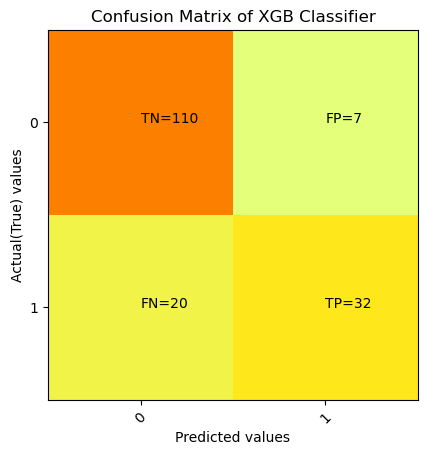

Classification report of XGB Classifer: 
               precision    recall  f1-score   support

           0     0.8462    0.9402    0.8907       117
           1     0.8205    0.6154    0.7033        52

    accuracy                         0.8402       169
   macro avg     0.8333    0.7778    0.7970       169
weighted avg     0.8383    0.8402    0.8330       169



In [106]:
xgbcm =confusion_matrix(y_test, xgb_predict)
plt.clf()
plt.imshow(xgbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of XGB Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (xgbcm[i][j]))
plt.show()

print('Classification report of XGB Classifer: \n',classification_report(y_test, xgb_predict, digits=4))

##### ROC AUC Score

In [107]:
xgbauc = roc_auc_score(y_test, xgb_predict)
print("ROC AUC score of XGB Classifier: ",xgbauc)

ROC AUC score of XGB Classifier:  0.7777777777777778


##### ROC Curve

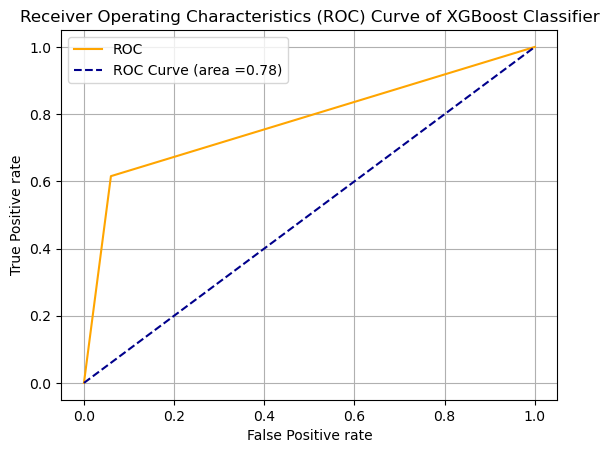

In [108]:
xgbfpr, xgbtpr, xgbthresholds= roc_curve(y_test, xgb_predict)
plt.plot(xgbfpr, xgbtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % xgbauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of XGBoost Classifier')
plt.legend()
plt.grid()
plt.show()

### 10.10: LightGBM Classifier

##### Train score, Test score and Misclassification rate

In [109]:
print("Train accuracy of LGBM Classifier : ", lgbm.score(X_train, y_train)*100)
print("Accuracy (Test) score of LGBM Classifier: ", accuracy_score(y_test, lgbm_predict)*100)
print("Misclassification rate of LGBM Classifier: ", 100-(accuracy_score(y_test, lgbm_predict)*100))

Train accuracy of LGBM Classifier :  88.91089108910892
Accuracy (Test) score of LGBM Classifier:  83.4319526627219
Misclassification rate of LGBM Classifier:  16.568047337278102


##### Confusion Matrix and Classification Report

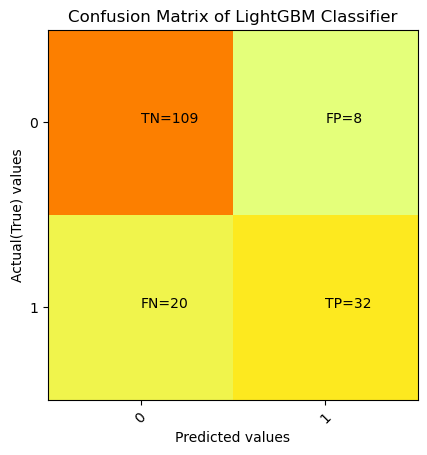

Classification report of LightGBM Classifer: 
               precision    recall  f1-score   support

           0     0.8450    0.9316    0.8862       117
           1     0.8000    0.6154    0.6957        52

    accuracy                         0.8343       169
   macro avg     0.8225    0.7735    0.7909       169
weighted avg     0.8311    0.8343    0.8276       169



In [110]:
lgbmcm =confusion_matrix(y_test, lgbm_predict)
plt.clf()
plt.imshow(lgbmcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of LightGBM Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (lgbmcm[i][j]))
plt.show()

print('Classification report of LightGBM Classifer: \n',classification_report(y_test, lgbm_predict, digits=4))

##### ROC AUC Score

In [111]:
lgbmauc = roc_auc_score(y_test, lgbm_predict)
print("ROC AUC score of LGBM Classifier: ",lgbmauc)

ROC AUC score of LGBM Classifier:  0.7735042735042735


##### ROC Curve

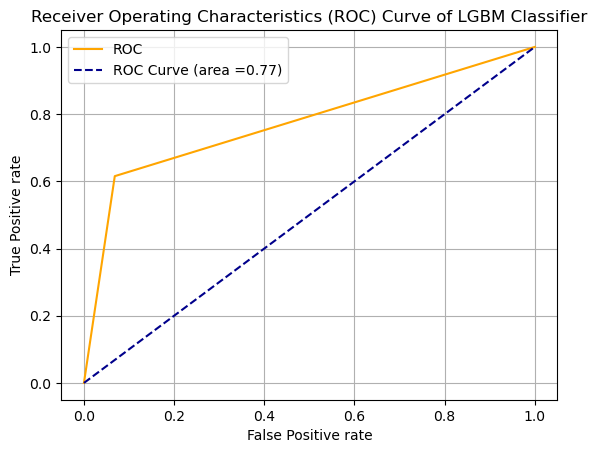

In [112]:
lgbmfpr, lgbmtpr, lgbmthresholds= roc_curve(y_test, lgbm_predict)
plt.plot(lgbmfpr, lgbmtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % lgbmauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of LGBM Classifier')
plt.legend()
plt.grid()
plt.show()

### 10.11: Cat-Boost Classifier

##### Train score, Test score and Misclassification rate

In [113]:
print("Train accuracy of Cat-Boosting Classifier : ", cb.score(X_train, y_train)*100)
print("Accuracy (Test) score of Cat-Boosting Classifier: ", accuracy_score(y_test, cb_predict)*100)
print("Misclassification rate of Cat-Boosting Classifier: ", 100-(accuracy_score(y_test, cb_predict)*100))

Train accuracy of Cat-Boosting Classifier :  83.16831683168317
Accuracy (Test) score of Cat-Boosting Classifier:  81.06508875739645
Misclassification rate of Cat-Boosting Classifier:  18.934911242603548


##### Confusion Matrix and Classification Report

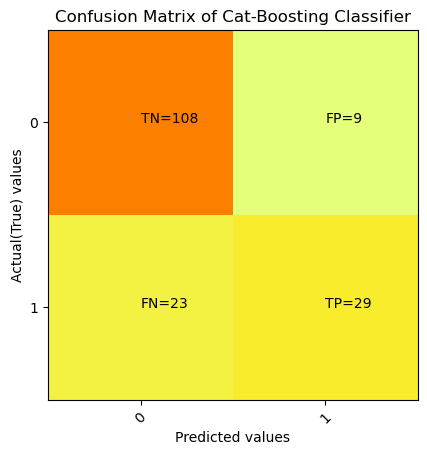

Classification report of Cat-Boosting Classifer: 
               precision    recall  f1-score   support

           0     0.8244    0.9231    0.8710       117
           1     0.7632    0.5577    0.6444        52

    accuracy                         0.8107       169
   macro avg     0.7938    0.7404    0.7577       169
weighted avg     0.8056    0.8107    0.8013       169



In [114]:
cbcm =confusion_matrix(y_test, cb_predict)
plt.clf()
plt.imshow(cbcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Cat-Boosting Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (cbcm[i][j]))
plt.show()

print('Classification report of Cat-Boosting Classifer: \n',classification_report(y_test, cb_predict, digits=4))

##### ROC AUC Score

In [115]:
cbauc = roc_auc_score(y_test, cb_predict)
print("ROC AUC score of Cat_Boost Classifier: ",cbauc)

ROC AUC score of Cat_Boost Classifier:  0.7403846153846154


##### ROC Curve

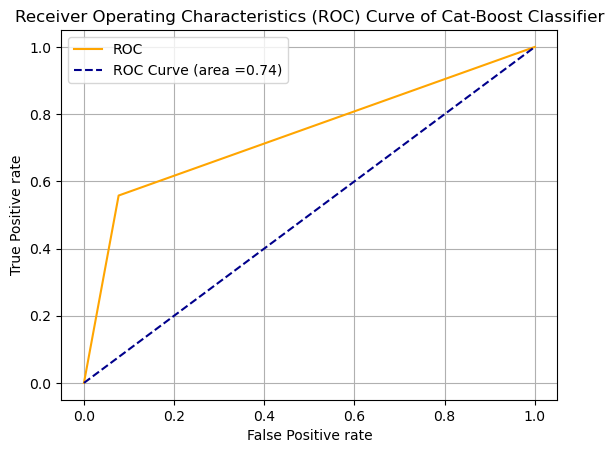

In [116]:
cbfpr, cbtpr, cbthresholds= roc_curve(y_test, cb_predict)
plt.plot(cbfpr, cbtpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % cbauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of Cat-Boost Classifier')
plt.legend()
plt.grid()
plt.show()

### 10.12: Guassian Process Classifier

##### Train score, Test score and Misclassification rate

In [117]:
print("Train accuracy of Gaussian Process Classifier : ", gpc.score(X_train, y_train)*100)
print("Accuracy (Test) score of Gaussian Process Classifier: ", accuracy_score(y_test, gpc_predict)*100)
print("Misclassification rate of Gaussian Process Classifier: ", 100-(accuracy_score(y_test, gpc_predict)*100))

Train accuracy of Gaussian Process Classifier :  77.42574257425743
Accuracy (Test) score of Gaussian Process Classifier:  82.84023668639054
Misclassification rate of Gaussian Process Classifier:  17.15976331360946


##### Confusion Matrix and Classification Report

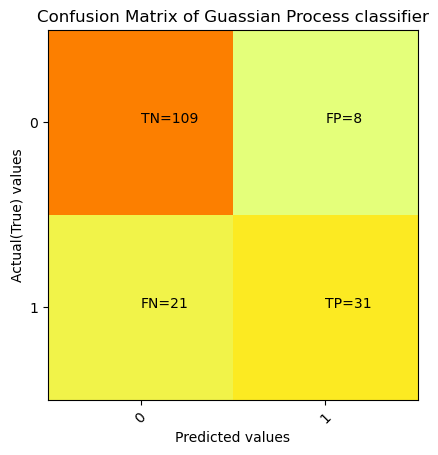

Classification report of Guassian Process classifier: 
               precision    recall  f1-score   support

           0     0.8385    0.9316    0.8826       117
           1     0.7949    0.5962    0.6813        52

    accuracy                         0.8284       169
   macro avg     0.8167    0.7639    0.7820       169
weighted avg     0.8250    0.8284    0.8207       169



In [118]:
gpccm =confusion_matrix(y_test, gpc_predict)
plt.clf()
plt.imshow(gpccm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Guassian Process classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (gpccm[i][j]))
plt.show()

print('Classification report of Guassian Process classifier: \n',classification_report(y_test, gpc_predict, digits=4))

##### ROC AUC Score

In [119]:
gpcauc = roc_auc_score(y_test, gpc_predict)
print("ROC AUC score of GPC: ",gpcauc)

ROC AUC score of GPC:  0.763888888888889


##### ROC Curve

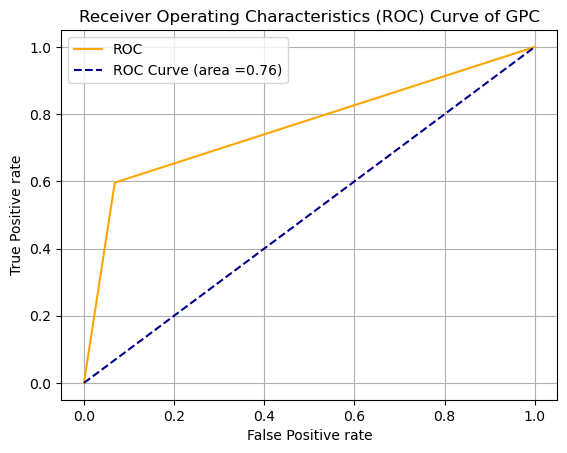

[inf  1.  0.]


In [120]:
gpcfpr, gpctpr, gpcthresholds= roc_curve(y_test, gpc_predict)
plt.plot(gpcfpr, gpctpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % gpcauc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of GPC')
plt.legend()
plt.grid()
plt.show()
print(gpcthresholds)

### 10.13: Multilayer Perceptron Classifier

##### Train score, Test score and Misclassification rate

In [121]:
print("Train accuracy of Multilayer Perceptron : ", mlp.score(X_train, y_train)*100)
print("Accuracy (Test) score of MLP: ", accuracy_score(y_test, mlp_predict)*100)
print("Misclassification rate of MLP: ", 100-(accuracy_score(y_test, mlp_predict)*100))

Train accuracy of Multilayer Perceptron :  33.46534653465347
Accuracy (Test) score of MLP:  30.76923076923077
Misclassification rate of MLP:  69.23076923076923


##### Confusion Matrix and Classification Report

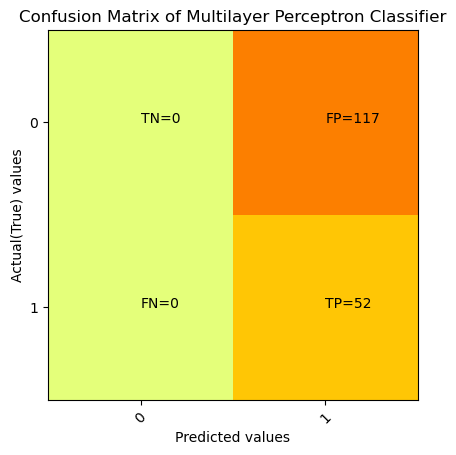

Classification report of MLP Classifer: 
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       117
           1     0.3077    1.0000    0.4706        52

    accuracy                         0.3077       169
   macro avg     0.1538    0.5000    0.2353       169
weighted avg     0.0947    0.3077    0.1448       169



In [122]:
mlpcm =confusion_matrix(y_test, mlp_predict)
plt.clf()
plt.imshow(mlpcm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Multilayer Perceptron Classifier')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+ str (mlpcm[i][j]))
plt.show()

print('Classification report of MLP Classifer: \n',classification_report(y_test, mlp_predict, digits=4))

##### ROC AUC Score

In [123]:
mlpauc = roc_auc_score(y_test, mlp_predict)
print("ROC AUC score of GPC: ",mlpauc)

ROC AUC score of GPC:  0.5


##### ROC Curve

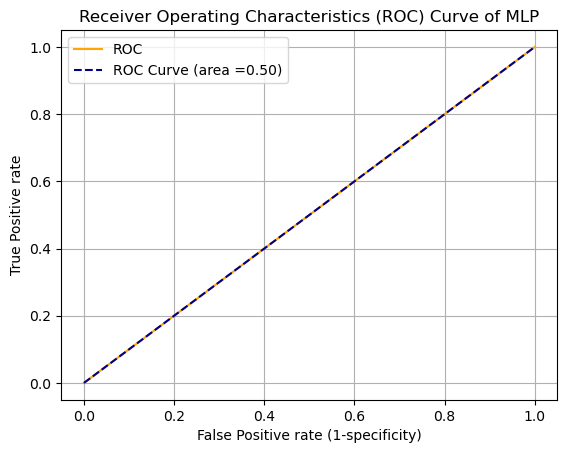

In [124]:
mlpfpr, mlptpr, mlpthresholds= roc_curve(y_test, mlp_predict)
plt.plot(mlpfpr, mlptpr, color='Orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle ='--', label='ROC Curve (area =%0.2f)' % mlpauc)
plt.xlabel('False Positive rate (1-specificity)')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics (ROC) Curve of MLP')
plt.legend()
plt.grid()
plt.show()


# Ranking based on Accuracy

In [125]:
# Calculate accuracy scores and store them in a dictionary
# "KNN": accuracy_score(y_test, knn_predict) * 100,
# "Naive Bayes": accuracy_score(y_test, nb_predict) * 100,
# "Decision Tree": accuracy_score(y_test, dt_predict) * 100,
# "AdaBoost": accuracy_score(y_test, adab_predict) * 100,
# "CatBoost": accuracy_score(y_test, cb_predict) * 100,
# "Gaussian Process": accuracy_score(y_test, gpc_predict) * 100,

accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_predict) * 100,
    "SVM": accuracy_score(y_test, sv_predict) * 100,    
    "Random Forest": accuracy_score(y_test, rf_predict) * 100,
    "Gradient Boosting": accuracy_score(y_test, gb_predict) * 100, 
    "XGBoost": accuracy_score(y_test, xgb_predict) * 100,
    "LGBM": accuracy_score(y_test, lgbm_predict) * 100,
    "MLP": accuracy_score(y_test, mlp_predict) * 100
}

# Print accuracy for each classifier
for clf_name, accuracy in accuracy_scores.items():
    print(f"Accuracy of {clf_name}: {accuracy:.2f}%")

# Rank classifiers based on accuracy
sorted_classifiers = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

print("\nRanking of classifiers based on accuracy:")
for rank, (clf_name, accuracy) in enumerate(sorted_classifiers, start=1):
    print(f"{rank}. {clf_name}: {accuracy:.6f}%")


Accuracy of Logistic Regression: 83.43%
Accuracy of SVM: 80.47%
Accuracy of Random Forest: 82.25%
Accuracy of Gradient Boosting: 82.84%
Accuracy of XGBoost: 84.02%
Accuracy of LGBM: 83.43%
Accuracy of MLP: 30.77%

Ranking of classifiers based on accuracy:
1. XGBoost: 84.023669%
2. Logistic Regression: 83.431953%
3. LGBM: 83.431953%
4. Gradient Boosting: 82.840237%
5. Random Forest: 82.248521%
6. SVM: 80.473373%
7. MLP: 30.769231%


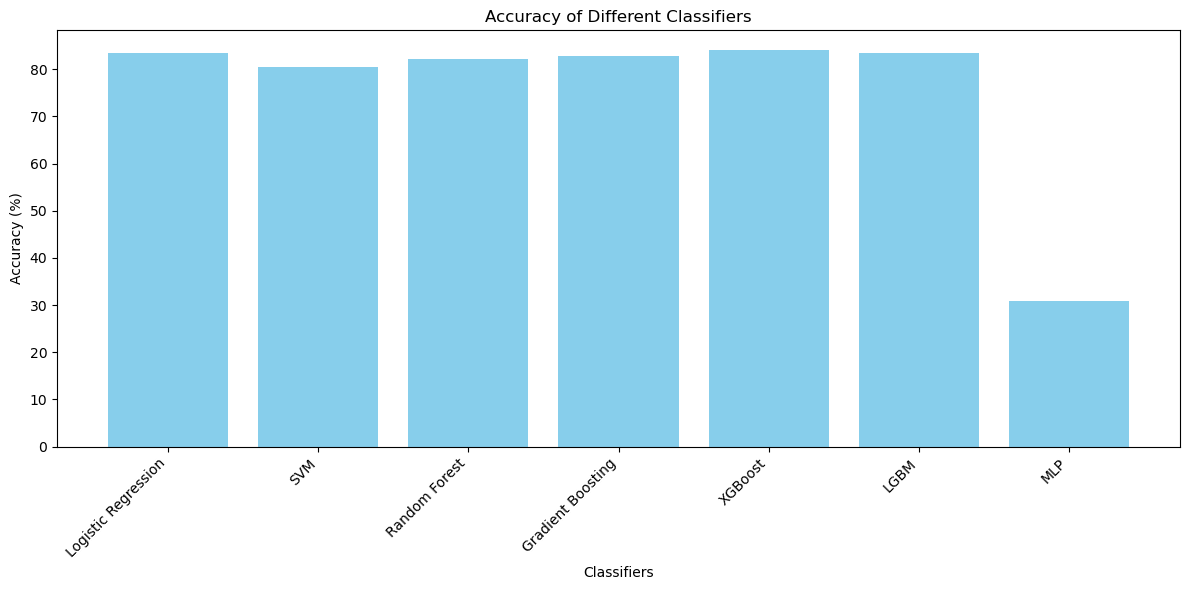

In [126]:
import matplotlib.pyplot as plt


# "KNN": accuracy_score(y_test, knn_predict) * 100,
# "Naive Bayes": accuracy_score(y_test, nb_predict) * 100,
# "Decision Tree": accuracy_score(y_test, dt_predict) * 100,
# "AdaBoost": accuracy_score(y_test, adab_predict) * 100,
# "CatBoost": accuracy_score(y_test, cb_predict) * 100,
# "Gaussian Process": accuracy_score(y_test, gpc_predict) * 100,



# Calculate accuracy scores and store them in a dictionary
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_predict) * 100,
    "SVM": accuracy_score(y_test, sv_predict) * 100,  
    "Random Forest": accuracy_score(y_test, rf_predict) * 100,
    "Gradient Boosting": accuracy_score(y_test, gb_predict) * 100, 
    "XGBoost": accuracy_score(y_test, xgb_predict) * 100,
    "LGBM": accuracy_score(y_test, lgbm_predict) * 100,
    "MLP": accuracy_score(y_test, mlp_predict) * 100
}

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


# 6.1 Performance Evaluation (Report)

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate


classifiers = [
    ("Logistic Regression", lr_predict),
    ("Gradient Boosting", gb_predict),
    ("XGBoost", xgb_predict),
    ("LGBM", lgbm_predict),
    ("Random Forest", rf_predict),
    ("MLP", mlp_predict),
    ("SVM", sv_predict),
       
]

results = []

# Calculate metrics for each classifier
for name, y_pred in classifiers:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a table using tabulate
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]
table = tabulate(results, headers=headers, tablefmt="grid")

# Print the table
print(table)


+---------------------+------------+-------------+----------+------------+-----------+
| Classifier          |   Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |
+=====================+============+=============+==========+============+===========+
| Logistic Regression |   0.83432  |    0.8      | 0.615385 |   0.695652 |  0.773504 |
+---------------------+------------+-------------+----------+------------+-----------+
| Gradient Boosting   |   0.828402 |    0.810811 | 0.576923 |   0.674157 |  0.758547 |
+---------------------+------------+-------------+----------+------------+-----------+
| XGBoost             |   0.840237 |    0.820513 | 0.615385 |   0.703297 |  0.777778 |
+---------------------+------------+-------------+----------+------------+-----------+
| LGBM                |   0.83432  |    0.8      | 0.615385 |   0.695652 |  0.773504 |
+---------------------+------------+-------------+----------+------------+-----------+
| Random Forest       |   0.822485 |    0.7

# 6.2 Ranking (AUC)

In [128]:
# Create a dictionary to store the classifiers and their ROC AUC scores

# 'K-Nearest Neighbors': knn_predict,
# 'Naive Bayes': nb_predict,
# 'Decision Tree': dt_predict,
# 'AdaBoost Classifier': adab_predict,
# 'CatBoost Classifier': cb_predict,
# 'Gaussian Process Classifier': gpc_predict,

classifiers = {
    'Logistic Regression': lr_predict,  
    'Support Vector Machine': sv_predict,   
    'Random Forest': rf_predict,
    'Gradient Boosting Classifier': gb_predict,  
    'XGB Classifier': xgb_predict,
    'LGBM Classifier': lgbm_predict,  
    'Multi-Layer Perceptron': mlp_predict
}

roc_auc_scores = {}

for clf_name, clf_predictions in classifiers.items():
    roc_auc = roc_auc_score(y_test, clf_predictions)
    roc_auc_scores[clf_name] = roc_auc


sorted_classifiers = sorted(roc_auc_scores.items(), key=lambda x: x[1], reverse=True)


for clf_name, roc_auc in sorted_classifiers:
    print(f"{clf_name}: ROC AUC = {roc_auc:.8f}")


XGB Classifier: ROC AUC = 0.77777778
Logistic Regression: ROC AUC = 0.77350427
LGBM Classifier: ROC AUC = 0.77350427
Gradient Boosting Classifier: ROC AUC = 0.75854701
Random Forest: ROC AUC = 0.75427350
Support Vector Machine: ROC AUC = 0.74145299
Multi-Layer Perceptron: ROC AUC = 0.50000000


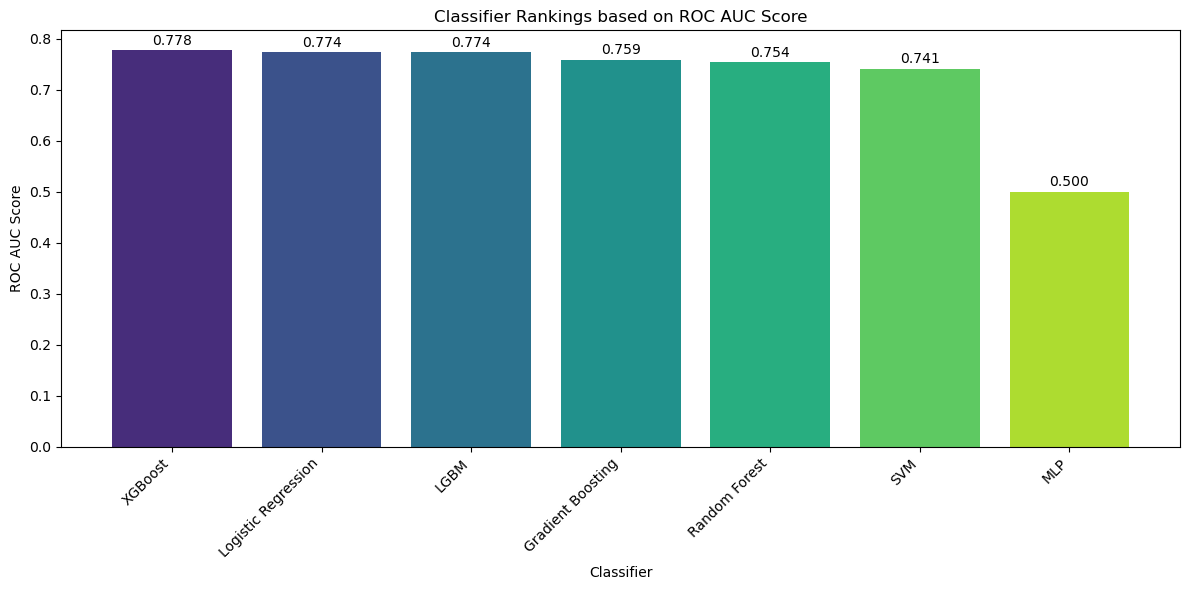

In [129]:
# Calculate ROC AUC scores
roc_auc_scores = {
    'Logistic Regression': lrauc,
    'Gradient Boosting': gbauc,
    'XGBoost': xgbauc,
    'LGBM': lgbmauc,
    'Random Forest': rfauc,
    'MLP': mlpauc,
    'SVM': svauc
    
    
}

# Sort the dictionary by ROC AUC scores in descending order
sorted_scores = {k: v for k, v in sorted(roc_auc_scores.items(), key=lambda item: item[1], reverse=True)}

# Extract classifier names and ROC AUC scores
classifiers = list(sorted_scores.keys())
auc_scores = list(sorted_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(classifiers))  # Using a color palette for different colors
plt.bar(classifiers, auc_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('ROC AUC Score')
plt.title('Classifier Rankings based on ROC AUC Score')
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the AUC values
for i, auc in enumerate(auc_scores):
    plt.text(i, auc + 0.005, f'{auc:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 6.3GUI

In [130]:
class DiabetesPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Diabetes Prediction GUI")

        # Create labels and entry fields for user input
        self.create_input_fields()

        self.result_label = ttk.Label(self.root, text="", font=("Helvetica", 12, "bold"))
        self.result_label.pack(pady=10)

        self.predict_button = ttk.Button(self.root, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.reset_button = ttk.Button(self.root, text="Reset", command=self.reset)
        self.reset_button.pack()

        self.reset()

    def create_input_fields(self):
        self.input_fields = {}  

        features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

        for feature in features:
            label = ttk.Label(self.root, text=feature + ":")
            label.pack()
            entry = ttk.Entry(self.root)
            entry.pack()
            self.input_fields[feature] = entry

    def predict(self):
        user_input = {}  

        for feature, entry in self.input_fields.items():
            user_input[feature] = float(entry.get())

        # Pre-process user input
        user_df = pd.DataFrame(user_input, index=[0])

        # Scale the user input
        scaled_user_input = scaler.transform(user_df)

        # Make predictions for all classifiers
        lr_predictions = lr.predict(scaled_user_input)
        rf_predictions = rf.predict(scaled_user_input)
        xgb_predictions = xgb.predict(scaled_user_input)

        # Count the predictions for each class
        diabetic_count_lr = sum(lr_predictions)
        diabetic_count_rf = sum(rf_predictions)
        diabetic_count_xgb = sum(xgb_predictions)
        
        diabetic_status_lr = "Yes" if diabetic_count_lr == 1 else "No"
        diabetic_status_rf = "Yes" if diabetic_count_rf == 1 else "No"
        diabetic_status_xgb = "Yes" if diabetic_count_xgb == 1 else "No"
        
        # Determine majority prediction
        majority_prediction = "Yes" if (diabetic_count_lr + diabetic_count_rf + diabetic_count_xgb) > 1 else "No"

        # Format the result message
        result = (
            f"Predicted as Diabetic (LR): {diabetic_status_lr}\n"
            f"Predicted as Diabetic (RF): {diabetic_status_rf}\n"
            f"Predicted as Diabetic (XGB): {diabetic_status_xgb}\n"
            f"Final Prediction of having Diabetic: {majority_prediction}"
        )

        self.result_label.config(text=result)  # Update the label text

    def reset(self):
        self.result_label.config(text="")
        for entry in self.input_fields.values():
            entry.delete(0, tk.END)

def main():
    root = tk.Tk()
    app = DiabetesPredictionApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()
